# 04 - Structural Alignment

## Summary

We have aligned all predictions against each other. We display the results here, studying three different aspects:

- The global TM-score distribution.
- The relationship between sequence identity and TM-score.
- The structural clustering of Nitrogenases.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import numpy as np
plt.rcParams['svg.fonttype'] = 'none'

## DDKK

In [2]:
ddkk_usalign = pd.read_csv(
    '../data/ddkk-tm-score.csv', sep='\s+', header=None, 
    names=['pdb1', 'pdb2', 'tm-score', 'tm-score2', 'rmsd', 'id1', 'id2', 'idali', 'l1', 'l2', 'lali']
)
ddkk_usalign['pdb1'] = ddkk_usalign['pdb1'].apply(lambda x: x.split('.')[0])
ddkk_usalign['pdb2'] = ddkk_usalign['pdb2'].apply(lambda x: x.split('.')[0])

**Figure 1**: Distribution of TM-scores across the DDKK all-vs-all structural alignment.

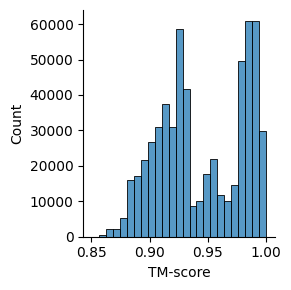

In [3]:
g = sns.displot(
    data=ddkk_usalign, x='tm-score2', height=3, aspect=1.0, bins=25
)
g.set_xlabels('TM-score')
g.savefig('../figures/ddkk-histogram-tmscore.svg')
g.savefig('../figures/ddkk-histogram-tmscore.png', dpi=300)

**Figure 2**: Distribution of RMSD across the DDKK all-vs-all structural alignment.

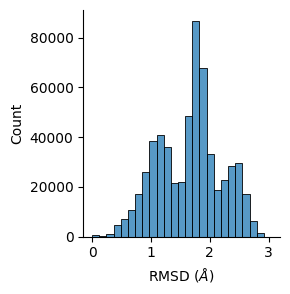

In [4]:
g = sns.displot(
    data=ddkk_usalign, x='rmsd', height=3, aspect=1.0, bins=25
)
g.set_xlabels('RMSD ($\AA$)')
g.savefig('../figures/ddkk-histogram-rmsd.svg')
g.savefig('../figures/ddkk-histogram-rmsd.png', dpi=300)

**Figure 3**: Joint distribution of TM-score (x-axis) and sequence identity (y-axis)

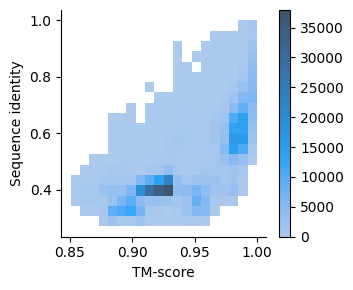

In [5]:
g = sns.displot(y='idali', x='tm-score2', data=ddkk_usalign, height=3, bins=20, cbar=True, aspect=1.2)
g.set_ylabels('Sequence identity')
g.set_xlabels('TM-score')
g.savefig('../figures/ddkk-histogram2D-tmscore-idali.svg')
g.savefig('../figures/ddkk-histogram2D-tmscore-idali.png', dpi=300)

**Figure 4**: Joint distribution of RMSD (x-axis) and sequence identity (y-axis)

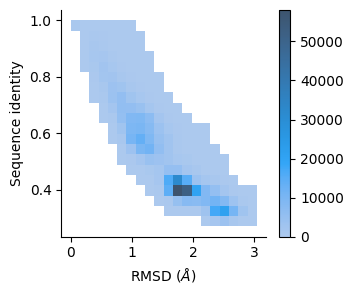

In [6]:
g = sns.displot(y='idali', x='rmsd', data=ddkk_usalign, height=3, bins=20, cbar=True, aspect=1.2)
g.set_ylabels('Sequence identity')
g.set_xlabels('RMSD ($\AA$)')
g.savefig('../figures/ddkk-histogram2D-rmsd-idali.svg')
g.savefig('../figures/ddkk-histogram2D-rmsd-idali.png', dpi=300)

To study the clustering, we will start by considering hierarchical clustering, generated by the clustermap method. First, we need to pivot the table.

In [7]:
ddkk_usalign_matrix = ddkk_usalign.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='tm-score2').dropna()
ddkk_usalign_matrix

pdb1,nsdb-000001,nsdb-000002,nsdb-000003,nsdb-000004,nsdb-000005,nsdb-000006,nsdb-000007,nsdb-000008,nsdb-000009,nsdb-000010,...,nsdb-000760,nsdb-000761,nsdb-000762,nsdb-000763,nsdb-000764,nsdb-000765,nsdb-000766,nsdb-000767,nsdb-000768,nsdb-000769
pdb2,,,,,,,,,,,,,,,,,,,,,
nsdb-000001,1.0000,0.9869,0.9912,0.9889,0.9243,0.9780,0.8760,0.9053,0.9255,0.9211,...,0.9899,0.9190,0.8920,0.9783,0.9927,0.9236,0.8865,0.9227,0.9895,0.9799
nsdb-000002,0.9790,1.0000,0.9834,0.9806,0.9219,0.9691,0.8691,0.8980,0.9210,0.9158,...,0.9862,0.9193,0.8880,0.9709,0.9850,0.9229,0.8781,0.9177,0.9879,0.9731
nsdb-000003,0.9882,0.9884,1.0000,0.9856,0.9251,0.9729,0.8741,0.9004,0.9237,0.9199,...,0.9915,0.9214,0.8878,0.9755,0.9942,0.9263,0.8818,0.9218,0.9906,0.9774
nsdb-000004,0.9934,0.9930,0.9931,1.0000,0.9290,0.9788,0.8815,0.9083,0.9306,0.9254,...,0.9926,0.9250,0.8969,0.9811,0.9945,0.9285,0.8919,0.9269,0.9923,0.9803
nsdb-000005,0.9106,0.9155,0.9142,0.9112,1.0000,0.9048,0.8662,0.8997,0.9696,0.9420,...,0.9138,0.9885,0.8854,0.9092,0.9112,0.9981,0.8746,0.9425,0.9137,0.9054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nsdb-000765,0.9072,0.9138,0.9126,0.9080,0.9952,0.9014,0.8631,0.8965,0.9649,0.9404,...,0.9119,0.9867,0.8832,0.9074,0.9088,1.0000,0.8706,0.9403,0.9112,0.9031
nsdb-000766,0.9682,0.9665,0.9658,0.9696,0.9695,0.9657,0.9635,0.9895,0.9725,0.9714,...,0.9684,0.9672,0.9794,0.9676,0.9663,0.9679,1.0000,0.9706,0.9673,0.9651
nsdb-000767,0.9455,0.9479,0.9474,0.9454,0.9804,0.9413,0.8988,0.9318,0.9802,0.9935,...,0.9483,0.9790,0.9152,0.9427,0.9442,0.9811,0.9107,1.0000,0.9464,0.9411


In [9]:
reference = pd.read_csv('../structures/reference.csv')
reference_types = reference[['id', 'clade']].set_index('id').to_dict()['clade']

**Figure 5**: DDKK-structural alignment clustermap, based on TM-scores. Each point of the matrix represents the alignment of a protein against another protein.

/home/bcz/miniconda3/envs/e24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/bcz/miniconda3/envs/e24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


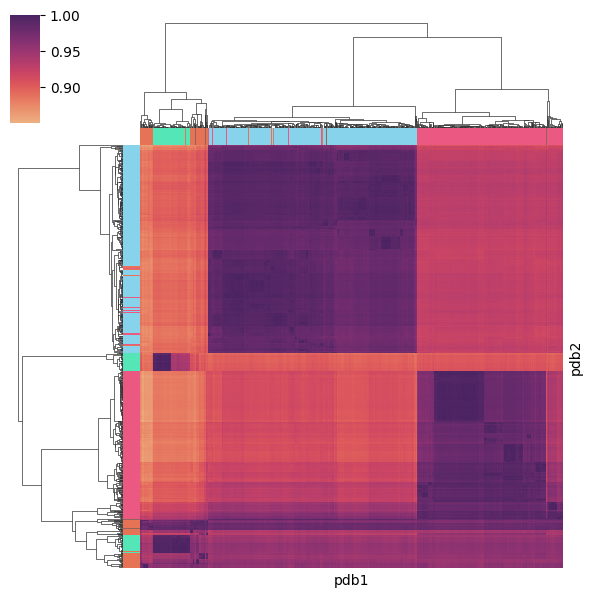

In [17]:
ddkk_usalign_matrix = ddkk_usalign.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='tm-score2').dropna()

palette = {
    'nif-i': '#EB5882',
    'nif-ii': '#86D3EB',
    'nif-iii': '#E67355',
    'an': '#55E6B8',
    'other': '#8F655A'
}
colors_rows = [palette[reference_types[x]] for x in ddkk_usalign_matrix.index.to_list()]
colors_columns = [palette[reference_types[x]] for x in ddkk_usalign_matrix.columns]

g = sns.clustermap(
    data=ddkk_usalign_matrix, figsize=(6, 6), col_cluster=True, xticklabels=False, yticklabels=False,
    row_colors=colors_rows, col_colors=colors_columns, cmap='flare'
)
g.savefig('../figures/ddkk-clustermap-tmscore.svg')
g.savefig('../figures/ddkk-clustermap-tmscore.png', dpi=300)

**Figure 6**: DDKK-structural alignment clustermap, based on RMSD. Each point of the matrix represents the alignment of a protein against another protein.

In [8]:
ddkk_usalign

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali
0,nsdb-000001,nsdb-000001,1.0000,1.0000,0.00,1.000,1.000,1.000,1974,1974,1974
1,nsdb-000002,nsdb-000001,0.9790,0.9869,1.35,0.596,0.601,0.603,1990,1974,1966
2,nsdb-000003,nsdb-000001,0.9882,0.9912,0.96,0.633,0.635,0.638,1980,1974,1966
3,nsdb-000004,nsdb-000001,0.9934,0.9889,1.02,0.645,0.642,0.646,1965,1974,1962
4,nsdb-000005,nsdb-000001,0.9106,0.9243,1.92,0.344,0.350,0.372,2004,1974,1856
...,...,...,...,...,...,...,...,...,...,...,...
587661,nsdb-000765,nsdb-000769,0.9031,0.9278,1.79,0.364,0.374,0.397,2010,1956,1842
587662,nsdb-000766,nsdb-000769,0.9651,0.8918,1.69,0.457,0.422,0.467,1806,1956,1768
587663,nsdb-000767,nsdb-000769,0.9411,0.9268,1.59,0.382,0.376,0.401,1926,1956,1834
587664,nsdb-000768,nsdb-000769,0.9820,0.9910,1.17,0.573,0.579,0.580,1974,1956,1952


In [10]:
reference_types

{'nsdb-000001': 'nif-ii',
 'nsdb-000002': 'nif-ii',
 'nsdb-000003': 'nif-iii',
 'nsdb-000004': 'nif-ii',
 'nsdb-000005': 'nif-i',
 'nsdb-000006': 'nif-ii',
 'nsdb-000007': 'nif-iii',
 'nsdb-000008': 'nif-iii',
 'nsdb-000009': 'nif-i',
 'nsdb-000010': 'nif-i',
 'nsdb-000011': 'nif-i',
 'nsdb-000012': 'nif-ii',
 'nsdb-000013': 'nif-ii',
 'nsdb-000014': 'nif-i',
 'nsdb-000015': 'nif-i',
 'nsdb-000016': 'nif-i',
 'nsdb-000017': 'nif-iii',
 'nsdb-000018': 'nif-i',
 'nsdb-000019': 'nif-i',
 'nsdb-000020': 'nif-ii',
 'nsdb-000021': 'nif-ii',
 'nsdb-000022': 'nif-ii',
 'nsdb-000023': 'nif-i',
 'nsdb-000024': 'nif-ii',
 'nsdb-000025': 'nif-ii',
 'nsdb-000026': 'nif-ii',
 'nsdb-000027': 'nif-i',
 'nsdb-000028': 'nif-ii',
 'nsdb-000029': 'nif-i',
 'nsdb-000030': 'nif-ii',
 'nsdb-000031': 'nif-i',
 'nsdb-000032': 'nif-ii',
 'nsdb-000033': 'nif-ii',
 'nsdb-000034': 'nif-i',
 'nsdb-000035': 'nif-ii',
 'nsdb-000036': 'nif-i',
 'nsdb-000037': 'nif-i',
 'nsdb-000038': 'nif-iii',
 'nsdb-000039': 'nif-ii

/home/bcz/miniconda3/envs/e24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/bcz/miniconda3/envs/e24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


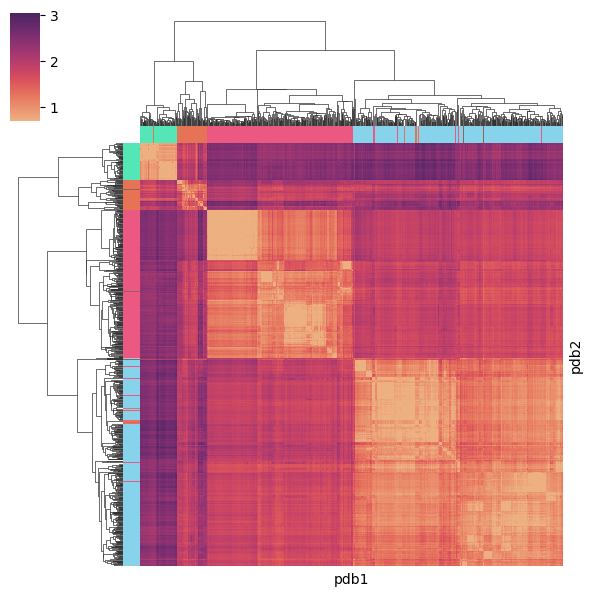

In [14]:
ddkk_usalign_matrix = ddkk_usalign.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='rmsd').dropna()


palette = {
    'nif-i': '#EB5882',
    'nif-ii': '#86D3EB',
    'nif-iii': '#E67355',
    'an': '#55E6B8',
    'other': '#8F655A'
}
colors_rows = [palette[reference_types[x]] for x in ddkk_usalign_matrix.index.to_list()]
colors_columns = [palette[reference_types[x]] for x in ddkk_usalign_matrix.columns]


g = sns.clustermap(
    data=ddkk_usalign_matrix, figsize=(6, 6), col_cluster=True, vmin=0.7, xticklabels=False, yticklabels=False,
    row_colors=colors_rows, col_colors=colors_columns, cmap='flare'
)
g.savefig('../figures/ddkk-clustermap-rmsd.svg')
g.savefig('../figures/ddkk-clustermap-rmsd.png', dpi=300)

Let's check the most-disimilar pairs.

In [19]:
ddkk_usalign.sort_values(by='rmsd', ascending=True)

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali
0,nsdb-000001,nsdb-000001,1.0000,1.0000,0.00,1.000,1.000,1.000,1974,1974,1974
180558,nsdb-000220,nsdb-000236,1.0000,1.0000,0.00,1.000,1.000,1.000,1980,1980,1980
180415,nsdb-000077,nsdb-000236,1.0000,1.0000,0.00,1.000,1.000,1.000,1980,1980,1980
180341,nsdb-000003,nsdb-000236,1.0000,1.0000,0.00,1.000,1.000,1.000,1980,1980,1980
179804,nsdb-000235,nsdb-000235,1.0000,1.0000,0.00,1.000,1.000,1.000,1977,1977,1977
...,...,...,...,...,...,...,...,...,...,...,...
67264,nsdb-000363,nsdb-000088,0.9409,0.8827,3.01,0.301,0.282,0.305,1848,1974,1820
277336,nsdb-000088,nsdb-000363,0.8827,0.9409,3.01,0.282,0.301,0.305,1974,1848,1820
412293,nsdb-000470,nsdb-000538,0.8829,0.9412,3.01,0.301,0.321,0.326,1974,1848,1820
544069,nsdb-000237,nsdb-000713,0.8506,0.9444,3.04,0.343,0.382,0.387,2009,1804,1781


For the remaining part of the analysis, we will consider the network emerging from generating edges above a given threshold.

In [20]:
number_clusters = []

for threshold in np.arange(0.25, 3.0, 0.25):
    G = nx.Graph()
    for i, row in ddkk_usalign.iterrows():
        if row['rmsd'] < threshold:
            G.add_edge(row.pdb1, row.pdb2)
    number_clusters.append(
        dict(
            threshold=threshold, 
            n_clusters=nx.number_connected_components(G),
            n_edges=nx.number_of_edges(G),
            clustering=nx.average_clustering(G)
            
        )
    )

In [21]:
number_clusters = pd.DataFrame.from_records(number_clusters)

In [22]:
number_clusters

,threshold,n_clusters,n_edges,clustering
0,0.25,675,887,0.039983
1,0.50,221,4263,0.495220
2,0.75,37,14112,0.760142
3,1.00,9,37798,0.807326
4,1.25,3,79934,0.862647
5,1.50,1,106572,0.939965
6,1.75,1,152734,0.846329
7,2.00,1,225297,0.933805
8,2.25,1,247462,0.960121
9,2.50,1,276372,0.962888


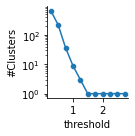

In [23]:
g = sns.relplot(x='threshold', y='n_clusters', data=number_clusters, kind='line', height=2.0, aspect=1.0 )
g.map(sns.scatterplot, 'threshold', 'n_clusters', data=number_clusters)
g.axes[0, 0].set_yscale('log')
g.set_ylabels('#Clusters')
g.savefig('../figures/ddkk.replot-rmsd-threshold-nclusters.svg')
g.savefig('../figures/ddkk.replot-rmsd-threshold-nclusters.png', dpi=300)

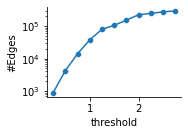

In [24]:
g = sns.relplot(x='threshold', y='n_edges', data=number_clusters, kind='line', height=2.0, aspect=1.5 )
g.map(sns.scatterplot, 'threshold', 'n_edges', data=number_clusters)
g.axes[0, 0].set_yscale('log')
g.set_ylabels('#Edges')
g.savefig('../figures/ddkk.replot-threshold-n_edges.svg')
g.savefig('../figures/ddkk.replot-threshold-n_edges.png', dpi=300)

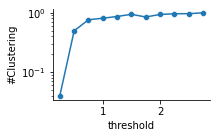

In [25]:
g = sns.relplot(x='threshold', y='clustering', data=number_clusters, kind='line', height=2.0, aspect=1.5 )
g.map(sns.scatterplot, 'threshold', 'clustering', data=number_clusters)
g.axes[0, 0].set_yscale('log')
g.set_ylabels('#Clustering')
g.savefig('../figures/ddkk.replot-threshold-clustering.svg')
g.savefig('../figures/ddkk.replot-threshold-clustering.png', dpi=300)

In [26]:
ddkk_usalign

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali
0,nsdb-000001,nsdb-000001,1.0000,1.0000,0.00,1.000,1.000,1.000,1974,1974,1974
1,nsdb-000002,nsdb-000001,0.9790,0.9869,1.35,0.596,0.601,0.603,1990,1974,1966
2,nsdb-000003,nsdb-000001,0.9882,0.9912,0.96,0.633,0.635,0.638,1980,1974,1966
3,nsdb-000004,nsdb-000001,0.9934,0.9889,1.02,0.645,0.642,0.646,1965,1974,1962
4,nsdb-000005,nsdb-000001,0.9106,0.9243,1.92,0.344,0.350,0.372,2004,1974,1856
...,...,...,...,...,...,...,...,...,...,...,...
587661,nsdb-000765,nsdb-000769,0.9031,0.9278,1.79,0.364,0.374,0.397,2010,1956,1842
587662,nsdb-000766,nsdb-000769,0.9651,0.8918,1.69,0.457,0.422,0.467,1806,1956,1768
587663,nsdb-000767,nsdb-000769,0.9411,0.9268,1.59,0.382,0.376,0.401,1926,1956,1834
587664,nsdb-000768,nsdb-000769,0.9820,0.9910,1.17,0.573,0.579,0.580,1974,1956,1952


In [27]:
ddkk_usalign['pdb1_type'] = ddkk_usalign.pdb1.map(reference_types)
ddkk_usalign['pdb2_type'] = ddkk_usalign.pdb2.map(reference_types)

In [28]:
ddkk_usalign

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali,pdb1_type,pdb2_type
0,nsdb-000001,nsdb-000001,1.0000,1.0000,0.00,1.000,1.000,1.000,1974,1974,1974,nif-ii,nif-ii
1,nsdb-000002,nsdb-000001,0.9790,0.9869,1.35,0.596,0.601,0.603,1990,1974,1966,nif-ii,nif-ii
2,nsdb-000003,nsdb-000001,0.9882,0.9912,0.96,0.633,0.635,0.638,1980,1974,1966,nif-iii,nif-ii
3,nsdb-000004,nsdb-000001,0.9934,0.9889,1.02,0.645,0.642,0.646,1965,1974,1962,nif-ii,nif-ii
4,nsdb-000005,nsdb-000001,0.9106,0.9243,1.92,0.344,0.350,0.372,2004,1974,1856,nif-i,nif-ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587661,nsdb-000765,nsdb-000769,0.9031,0.9278,1.79,0.364,0.374,0.397,2010,1956,1842,nif-i,nif-ii
587662,nsdb-000766,nsdb-000769,0.9651,0.8918,1.69,0.457,0.422,0.467,1806,1956,1768,nif-iii,nif-ii
587663,nsdb-000767,nsdb-000769,0.9411,0.9268,1.59,0.382,0.376,0.401,1926,1956,1834,nif-i,nif-ii
587664,nsdb-000768,nsdb-000769,0.9820,0.9910,1.17,0.573,0.579,0.580,1974,1956,1952,nif-ii,nif-ii


In [29]:
def create_sequence_similarity_network(df, threshold=0.7):

    G = nx.Graph()

    for _, row in df.iterrows():
        G.add_node(row.pdb1, type=row.pdb1_type)
        G.add_node(row.pdb2, type=row.pdb2_type)
        if row.rmsd < threshold:
            G.add_edge(row.pdb1, row.pdb2)

    return G

In [30]:
all_ssn = create_sequence_similarity_network(ddkk_usalign, 1.5)

In [31]:
all_ssn_centrality = nx.betweenness_centrality(all_ssn)
all_ssn_centrality = pd.DataFrame.from_dict(
    all_ssn_centrality, orient='index'
).reset_index().rename(columns={0: 'btw_centrality', 'index': 'pdb1'})
all_ssn_centrality['log_btw_centrality'] = all_ssn_centrality['btw_centrality'].apply(lambda x: np.log10(x))
all_ssn_centrality = pd.merge(all_ssn_centrality, ddkk_usalign[['pdb1', 'pdb1_type']].drop_duplicates('pdb1', keep='first'), on='pdb1', how='left')

In [32]:
all_ssn_centrality

,pdb1,btw_centrality,log_btw_centrality,pdb1_type
0,nsdb-000001,0.000022,-4.658961,nif-ii
1,nsdb-000002,0.000010,-4.985063,nif-ii
2,nsdb-000003,0.000016,-4.801011,nif-iii
3,nsdb-000004,0.000011,-4.965138,nif-ii
4,nsdb-000005,0.000063,-4.197369,nif-i
...,...,...,...,...
764,nsdb-000765,0.000318,-3.498146,nif-i
765,nsdb-000766,0.012579,-1.900367,nif-iii
766,nsdb-000767,0.000644,-3.191069,nif-i
767,nsdb-000768,0.000023,-4.646294,nif-ii


In [33]:
reference = pd.read_csv('../structures/reference.csv')
reference_types = reference[['id', 'nitrogenase_type']].set_index('id').to_dict()['nitrogenase_type']
all_ssn_centrality['type'] = all_ssn_centrality.pdb1.map(reference_types)

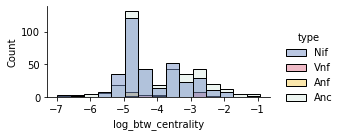

In [34]:
palette = {
    'Anc': '#DCEDE4',
    'Nif': '#7690C6', 
    'Vnf': '#E17891',
    'Anf': '#F9D15B',
}
g = sns.displot(
    data=all_ssn_centrality, x='log_btw_centrality', 
    hue='type', height=2.0, aspect=2.0, 
    palette=palette, bins=15
)
# g.savefig('../figures/ddkk-histogram-btw-structure-centrality.svg')
# g.savefig('../figures/ddkk-histogram-btw-structure-centrality.png', dpi=300)

In [35]:
def place_anc_tag(x):
    try:
        int(x.split('_')[0])
        return 'Anc_' + x + '_map'
    except:
        return x

distances_from_root = pd.read_csv('../data/tree/AGNifAlign103.asr.dist821.csv').rename(columns={'node': 'id'})
distances_from_root['id'] = distances_from_root['id'].apply(place_anc_tag)
distances_from_root

,id,dist_from_821
0,Anc_771_map,1.829611
1,Anc_772_map,1.795645
2,Anc_781_map,1.776833
3,Anc_783_map,1.756560
4,Anc_784_map,1.709936
...,...,...
1533,Anf_Dickeya_paradisiaca,2.029534
1534,Anf_Rahnella_sp_AA,2.062973
1535,Anf_Thiorhodococcus_drewsii,2.017386
1536,Anf_Geobacter_thiogenes,1.970585


In [36]:
reference['sequence_name'] = reference['original_name'].apply(lambda x: x.split('.')[0][:-4])
distances_from_root = pd.merge(
    distances_from_root.rename(columns={'id': 'sequence_name'}), 
    reference[['sequence_name', 'id']], 
    on='sequence_name'
)

In [37]:
all_ssn_centrality = pd.merge(all_ssn_centrality, distances_from_root, left_on='pdb1', right_on='id')

In [38]:
all_ssn_centrality

,pdb1,btw_centrality,log_btw_centrality,pdb1_type,type,sequence_name,dist_from_821,id
0,nsdb-000001,0.000022,-4.658961,nif-ii,Nif,Nif_Alkaliflexus_imshenetskii,1.865078,nsdb-000001
1,nsdb-000002,0.000010,-4.985063,nif-ii,Nif,Nif_Desulfohalovibrio_alkalitolerans,1.601819,nsdb-000002
2,nsdb-000003,0.000016,-4.801011,nif-iii,Nif,Nif_Candidatus_Methanolliviera_sp_GoM_asphalt,1.011302,nsdb-000003
3,nsdb-000004,0.000011,-4.965138,nif-ii,Nif,Nif_Marinilabilia_sp_WTE,1.690189,nsdb-000004
4,nsdb-000005,0.000063,-4.197369,nif-i,Nif,Nif_Cupriavidus_sp_amp6,1.788730,nsdb-000005
...,...,...,...,...,...,...,...,...
764,nsdb-000765,0.000318,-3.498146,nif-i,Anc,Anc_1281_map,1.469282,nsdb-000765
765,nsdb-000766,0.012579,-1.900367,nif-iii,Anc,Anc_809_map,0.451608,nsdb-000766
766,nsdb-000767,0.000644,-3.191069,nif-i,Anc,Anc_1218_map,1.375097,nsdb-000767
767,nsdb-000768,0.000023,-4.646294,nif-ii,Anc,Anc_1386_map,1.375966,nsdb-000768


/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


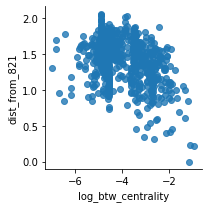

In [39]:
g = sns.lmplot(data=all_ssn_centrality, x='log_btw_centrality', y='dist_from_821',  palette=palette, height=3, aspect=1)
# g.savefig('../figures/scatter-structure-btwcentrality-distroot.png', dpi=300)
# g.savefig('../figures/scatter-structure-btwcentrality-distroot.svg')


In [40]:
from scipy.stats import linregress

In [41]:
x = all_ssn_centrality.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_btw_centrality', 'dist_from_821']).log_btw_centrality.values
y = all_ssn_centrality.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_btw_centrality', 'dist_from_821']).dist_from_821.values
linregress(x, y) 

LinregressResult(slope=-0.10929284750397304, intercept=0.9694868396172907, rvalue=-0.35637457070579504, pvalue=3.5487571593789716e-24, stderr=0.010407749910934915, intercept_stderr=0.04322941789402266)

In [42]:
nx.write_gml(all_ssn, '../data/networks/all-structure-similarity.15.gml')

## HH

In [43]:
hh_usalign = pd.read_csv(
    '../data/hh-tm-score.csv', sep='\s+', header=None, 
    names=['pdb1', 'pdb2', 'tm-score', 'tm-score2', 'rmsd', 'id1', 'id2', 'idali', 'l1', 'l2', 'lali']
)
hh_usalign['pdb1'] = hh_usalign['pdb1'].apply(lambda x: x.split('.')[0])
hh_usalign['pdb2'] = hh_usalign['pdb2'].apply(lambda x: x.split('.')[0])

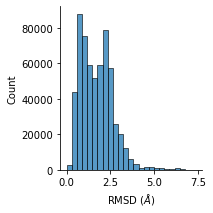

In [47]:
g = sns.displot(
    data=hh_usalign, x='rmsd', height=3, aspect=1.0, bins=25
)
g.set_xlabels('RMSD ($\AA$)')
g.savefig('../figures/hh-histogram-rmsd.svg')
g.savefig('../figures/hh-histogram-rmsd.png', dpi=300)

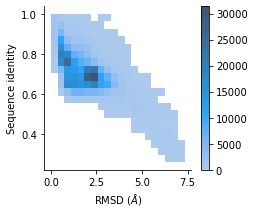

In [48]:
g = sns.displot(
    y='idali', x='rmsd', data=hh_usalign,  height=3, bins=20, cbar=True, aspect=1.2
)
g.set_ylabels('Sequence identity')
g.set_xlabels('RMSD ($\AA$)')
g.savefig('../figures/hh-histogram2D-rmsd-idali.svg')
g.savefig('../figures/hh-histogram2D-rmsd-idali.png', dpi=300)

/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


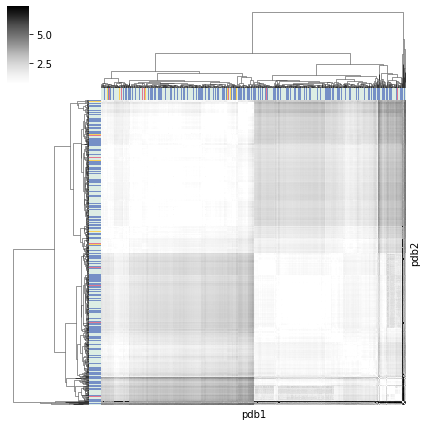

In [49]:
hh_usalign_matrix = hh_usalign.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='rmsd').dropna()



colors_rows = [palette[reference_types[x]] for x in hh_usalign_matrix.index.to_list()]
colors_columns = [palette[reference_types[x]] for x in hh_usalign_matrix.columns]


g = sns.clustermap(
    data=hh_usalign_matrix, figsize=(6, 6), col_cluster=True, cmap='Greys', vmin=0.7, xticklabels=False, yticklabels=False,
    row_colors=colors_rows, col_colors=colors_columns,
)
g.savefig('../figures/hh-clustermap-rmsd.svg')
g.savefig('../figures/hh-clustermap-rmsd.png', dpi=300)

In [50]:
hh_usalign.sort_values(by='rmsd', ascending=False)

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali
365954,nsdb-001449,nsdb-001245,0.5657,0.5455,7.34,0.273,0.260,0.303,542,569,488
522626,nsdb-001245,nsdb-001449,0.5455,0.5657,7.34,0.260,0.273,0.303,569,542,488
186777,nsdb-001449,nsdb-001012,0.5614,0.5268,7.30,0.295,0.271,0.331,542,590,484
522393,nsdb-001012,nsdb-001449,0.5268,0.5614,7.30,0.271,0.295,0.331,590,542,484
522537,nsdb-001156,nsdb-001449,0.5373,0.5654,7.25,0.245,0.262,0.293,580,542,484
...,...,...,...,...,...,...,...,...,...,...,...
390390,nsdb-001277,nsdb-001277,1.0000,1.0000,0.00,1.000,1.000,1.000,540,540,540
389620,nsdb-001276,nsdb-001276,1.0000,1.0000,0.00,1.000,1.000,1.000,542,542,542
388850,nsdb-001275,nsdb-001275,1.0000,1.0000,0.00,1.000,1.000,1.000,540,540,540
388080,nsdb-001274,nsdb-001274,1.0000,1.0000,0.00,1.000,1.000,1.000,602,602,602


## Intra-variant alignments

In [51]:
ddkk_variants_usalign = pd.read_csv(
    '../data/ddkk-ancestral-variants.usalign.csv', sep='\s+', header=None, 
    names=['pdb1', 'pdb2', 'tm-score', 'tm-score2', 'rmsd', 'id1', 'id2', 'idali', 'l1', 'l2', 'lali']
)
ddkk_variants_usalign['pdb1'] = ddkk_variants_usalign['pdb1'].apply(lambda x: x.split('.')[0])
ddkk_variants_usalign['pdb2'] = ddkk_variants_usalign['pdb2'].apply(lambda x: x.split('.')[0])

In [52]:
ddkk_variants_usalign['parent'] = ddkk_variants_usalign['pdb1'].apply(lambda x: '_'.join(x.split('_')[:2]))
ddkk_variants_usalign['is_same_structure'] = ddkk_variants_usalign.apply(lambda x: x['pdb1'] == x['pdb2'], axis=1)
ddkk_variants_usalign = ddkk_variants_usalign.query('is_same_structure == False')
ddkk_variants_usalign

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali,parent,is_same_structure
1,Anc_1206_alt2_001,Anc_1206_alt3_001,0.9981,0.9981,0.60,0.859,0.859,0.859,1860,1860,1860,Anc_1206,False
2,Anc_1206_alt2_001,Anc_1206_alt4_001,0.9973,0.9973,0.71,0.865,0.865,0.865,1860,1860,1860,Anc_1206,False
3,Anc_1206_alt2_001,Anc_1206_alt5_001,0.9979,0.9979,0.63,0.852,0.852,0.852,1860,1860,1860,Anc_1206,False
4,Anc_1206_alt2_001,Anc_1206_altall_001,0.9965,0.9965,0.85,0.848,0.848,0.848,1860,1860,1860,Anc_1206,False
5,Anc_1206_alt2_001,Anc_1206_map_001,0.9981,0.9981,0.59,0.872,0.872,0.872,1860,1860,1860,Anc_1206,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13712,Anc_821_map_001,Anc_821_alt2_001,0.9887,0.9975,0.68,0.843,0.851,0.851,1826,1810,1810,Anc_821,False
13713,Anc_821_map_001,Anc_821_alt3_001,0.9889,0.9976,0.67,0.825,0.832,0.832,1826,1810,1810,Anc_821,False
13714,Anc_821_map_001,Anc_821_alt4_001,0.9880,0.9967,0.80,0.838,0.845,0.845,1826,1810,1810,Anc_821,False
13715,Anc_821_map_001,Anc_821_alt5_001,0.9893,0.9980,0.60,0.837,0.844,0.844,1826,1810,1810,Anc_821,False


In [53]:
ddkk_variants_usalign_mean = ddkk_variants_usalign.groupby('parent').mean()

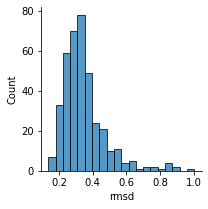

In [54]:
sns.displot(x='rmsd', data=ddkk_variants_usalign_mean, bins=20, height=3)

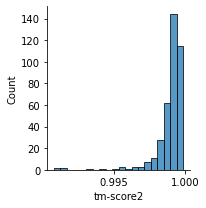

In [55]:
sns.displot(x='tm-score2', data=ddkk_variants_usalign_mean, bins=20, height=3)

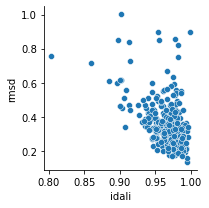

In [56]:
sns.relplot(y='rmsd', x='idali', data=ddkk_variants_usalign_mean, height=3)

In [57]:
ddkk_variants_usalign_mean.sort_values(ascending=False, by='rmsd')

,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali,is_same_structure
parent,,,,,,,,,,
Anc_814,0.990933,0.990933,1.004000,0.898067,0.898067,0.902067,1872.666667,1872.666667,1864.000000,0.0
Anc_816,0.991673,0.991673,0.899333,0.948533,0.948533,0.953333,1862.666667,1862.666667,1853.133333,0.0
Anc_818,0.994227,0.994227,0.896000,0.995900,0.995900,0.998267,1868.500000,1868.500000,1864.200000,0.0
Anc_817,0.996600,0.996600,0.858000,0.977000,0.977000,0.977267,1862.500000,1862.500000,1862.000000,0.0
Anc_815,0.996353,0.996353,0.852667,0.954800,0.954800,0.955267,1863.000000,1863.000000,1862.133333,0.0
...,...,...,...,...,...,...,...,...,...,...
Anc_1477,0.999660,0.999660,0.176000,0.977900,0.977900,0.978067,1958.333333,1958.333333,1958.000000,0.0
Anc_1524,0.999667,0.999667,0.174667,0.972967,0.972967,0.973133,1942.333333,1942.333333,1942.000000,0.0
Anc_800,0.999820,0.999820,0.169333,0.987800,0.987800,0.987800,1848.000000,1848.000000,1848.000000,0.0
